# Plot schematics of collapsing confidence intervals
This function makes some illustrative curves of uncertainty change over time. It requires no inputs. 

In [1]:
import matplotlib.pyplot as plt
from labellines import labelLines
import numpy as np

In [2]:
font = {'family' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

In [3]:
# Define some constants for the curve before obserevations
startyear = 2010
x = np.arange(startyear, 2101)
dt = x - startyear
Tstart = 1.05
fringe = 0.035
T0 = Tstart + dt * (1.26 - 0.006 * dt) / 100
Tend = T0[-1]
Tupper = T0 + dt * 1 / 285 * (T0 - Tstart + 0.2) + fringe
Tlower = T0 - dt * 1 / 190 * (T0 - Tstart + 0.2) - fringe

In [4]:
# Define behaviour after observations
latertime = 2060
laterind = latertime-startyear
np.random.seed(11)
TrealisedSmooth = {
    0: Tstart + (T0-Tstart) * 1.12, 
    1: Tstart + (T0-Tstart) * 0.84
}
Trealised = {}
x2 = np.arange(latertime, 2101)
Tnewplanupper = {}
Tnewplanlower = {}
Tnewmed = {}
for ind in [0, 1]:
    Trealised[ind] = TrealisedSmooth[ind] + (np.random.rand(len(x)) - 0.5) * 0.07
    Tlaterupper = Trealised[ind][laterind] + (T0[laterind:] - T0[laterind]) + (x2 - latertime) * 1 / 240 * (T0[laterind:] - T0[laterind] + 0.2) + fringe
    Tlaterlower = Trealised[ind][laterind] + (T0[laterind:] - T0[laterind]) - (x2 - latertime) * 1 / 190 * (T0[laterind:] - T0[laterind] + 0.2) - fringe
    # Construct a new planned pathway
    Tnewplanupper[ind] = 2.0 + (2.0 - Tlaterupper[0]) * (x2 - 2100) / (2100 - latertime)
    Tnewplanlower[ind] = Tnewplanupper[ind] + Tlaterlower - Tlaterupper
    Tnewmed[ind] = (Tnewplanupper[ind] + Tnewplanlower[ind])/2

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


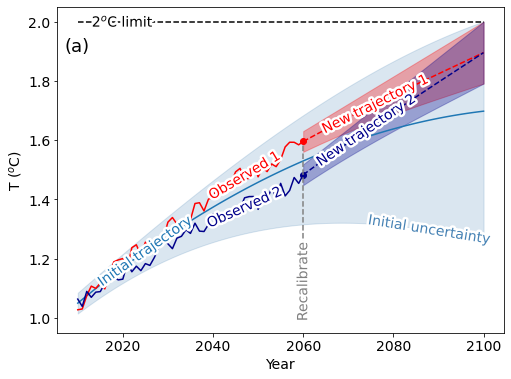

In [5]:
# Make the plots using the currently dominant method
plt.figure(figsize=(8,6))
plt.plot(x, T0, label="Initial trajectory")
plt.fill_between(x, Tupper, Tlower, alpha= 0.2, color="steelblue")
# We use invisible lines to align the text
plt.plot(x,  Tlower, alpha=0.0, label="Initial uncertainty", color="steelblue")
plt.plot(x[:laterind+1], Trealised[0][:laterind+1], color="red")
plt.scatter(latertime, Trealised[0][laterind], color="red")
plt.plot(x[:laterind+1], Trealised[1][:laterind+1], color="darkblue")
plt.plot(x[:laterind+1], TrealisedSmooth[0][:laterind+1], label="Observed 1", color="red", alpha=0.0)
plt.plot(x[:laterind+1], TrealisedSmooth[1][:laterind+1], label="Observed 2", color="darkblue", alpha=0.0)
plt.scatter(latertime, Trealised[1][laterind], color="darkblue")

plt.xlabel("Year")
plt.ylabel("T ($^o$C)")
plt.plot([2010, 2100], [2, 2], linestyle="--", color="black", label="2$^o$C limit")
plt.fill_between(x2, Tnewplanupper[0], Tnewplanlower[0], alpha=0.3, color="red")
plt.plot(x2, Tnewmed[0], linestyle="--", color="red", label="New trajectory 1")
plt.fill_between(x2, Tnewplanupper[1], Tnewplanlower[1], alpha=0.3, color="darkblue")
plt.plot(x2, Tnewmed[1], linestyle="--", color="darkblue", label="New trajectory 2")
plt.plot([latertime, latertime+0.00001], [1, TrealisedSmooth[0][laterind]], color="grey", linestyle="--", label="Recalibrate")
lines = plt.gca().get_lines()
labelLines(lines[:2], align=True, xvals=[2025, 2088])
labelLines(lines[4:6], align=True, xvals=[2047, 2047])
labelLines(lines[6:], align=True, xvals=[2020, 2076, 2074, latertime+0.0000021])
plt.text(2007, 1.9, "(a)", fontsize=18)
plt.savefig("./output/ConfidenceWindowEvolutionFig.png", dpi=300, bbox_inches='tight') 

In [6]:
# Construct pathways with median temperature conserved
for ind in [0, 1]:
    Tnewmed[ind] = Trealised[ind][laterind] + (Tend - Trealised[ind][laterind]) * (x2-latertime) / (2100 - latertime)

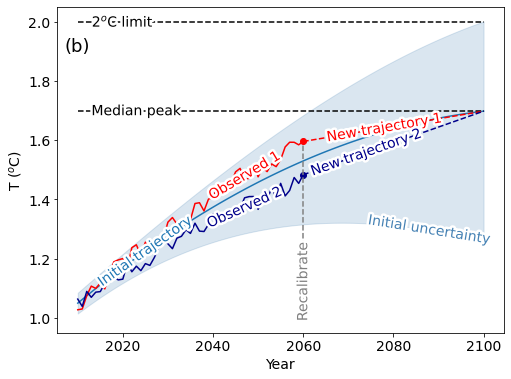

In [7]:
# Plot these
plt.figure(figsize=(8,6))
plt.plot(x, T0, label="Initial trajectory")
plt.fill_between(x, Tupper, Tlower, alpha= 0.2, color="steelblue")
# We use invisible lines to align the text
plt.plot(x,  Tlower, alpha=0.0, label="Initial uncertainty", color="steelblue")
plt.plot(x[:laterind+1], Trealised[0][:laterind+1], color="red")
plt.scatter(latertime, Trealised[0][laterind], color="red")
plt.plot(x[:laterind+1], Trealised[1][:laterind+1], color="darkblue")
plt.plot(x[:laterind+1], TrealisedSmooth[0][:laterind+1], label="Observed 1", color="red", alpha=0.0)
plt.plot(x[:laterind+1], TrealisedSmooth[1][:laterind+1], label="Observed 2", color="darkblue", alpha=0.0)
plt.scatter(latertime, Trealised[1][laterind], color="darkblue")

plt.xlabel("Year")
plt.ylabel("T ($^o$C)")
plt.plot([2010, 2100], [2, 2], linestyle="--", color="black", label="2$^o$C limit")
plt.plot([2010, 2100], [Tend, Tend], linestyle="--", color="black", label="Median peak")
plt.plot(x2, Tnewmed[0], linestyle="--", color="red", label="New trajectory 1")
plt.plot(x2, Tnewmed[1], linestyle="--", color="darkblue", label="New trajectory 2")
plt.plot(
    [latertime, latertime+0.00001], [1, TrealisedSmooth[0][laterind]], 
    color="grey", linestyle="--", label="Recalibrate"
)
lines = plt.gca().get_lines()
labelLines(lines[:2], align=True, xvals=[2025, 2088])
labelLines(lines[4:6], align=True, xvals=[2047, 2047])
labelLines(lines[6:], align=True, xvals=[2020, 2023, 2078, 2074, latertime+0.0000021])
plt.text(2007, 1.9, "(b)", fontsize=18)
plt.savefig("./output/ConfidenceWindowEvolutionFig_medianTemp.png", dpi=300, bbox_inches='tight')